In [87]:
import geopandas as gpd
import pandas as pd

In [88]:
# Total Precipitation preparation
# Load CSV
df_csv = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/kualitas_udara/pm25/pm25_satuan_kec.csv')
tp_mean = df_csv.groupby(['longitude', 'latitude'], as_index=False)['pm2p5'].mean()

In [89]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/roniabuhanif/Downloads/BMKG/data_skripsi/petadki_kecamatan_2/kecamatan/Kecamatan-DKI-Jakarta-polygon.shp")

In [90]:
# Convert DataFrame to GeoDataFrame
geometry = gpd.points_from_xy(tp_mean['longitude'], tp_mean['latitude'])
gdf_csv = gpd.GeoDataFrame(tp_mean, geometry=geometry, crs=4326)


<Axes: >

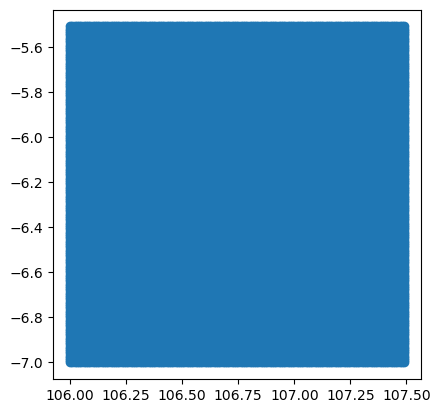

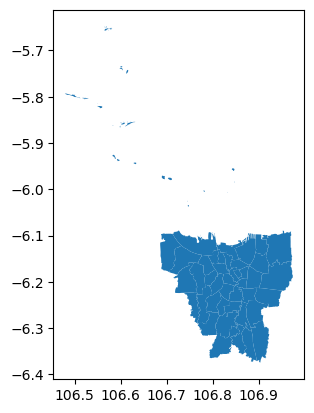

In [91]:
gdf_csv.plot()
gdf_shapefile.plot()

In [92]:
# spatial join
result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')
result_pop = result[['longitude', 'latitude', 'pm2p5', 'name', 'geometry']]

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 529 entries, 7620 to 14640
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   longitude  529 non-null    float64 
 1   latitude   529 non-null    float64 
 2   pm2p5      529 non-null    float64 
 3   name       529 non-null    object  
 4   geometry   529 non-null    geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 24.8+ KB


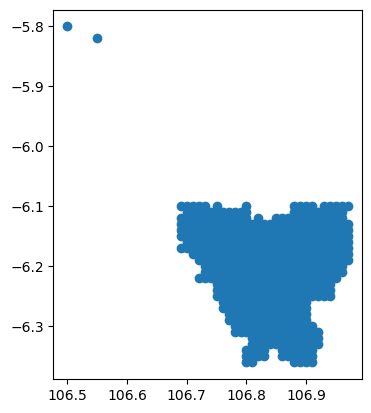

In [93]:
result_pop.plot()
result_pop.info()

In [94]:

dissolved_result = result_pop.dissolve(by='name', aggfunc='mean')
dissolved_result.head(40
                      )

,geometry,longitude,latitude,pm2p5
name,,,,
Cakung,"MULTIPOINT ((106.91000 -6.21000), (106.91000 -...",106.942813,-6.188125,52.758113
Cempaka Putih,"MULTIPOINT ((106.86000 -6.19000), (106.86000 -...",106.866000,-6.182000,53.256031
Cengkareng,"MULTIPOINT ((106.71000 -6.18000), (106.72000 -...",106.734762,-6.150952,52.865959
Cilandak,"MULTIPOINT ((106.77000 -6.29000), (106.78000 -...",106.792857,-6.292143,56.706228
Cilincing,"MULTIPOINT ((106.91000 -6.10000), (106.92000 -...",106.943714,-6.127714,50.541259
Cipayung,"MULTIPOINT ((106.89000 -6.34000), (106.89000 -...",106.903478,-6.324783,55.830259
Ciracas,"MULTIPOINT ((106.87000 -6.35000), (106.87000 -...",106.877692,-6.333077,56.113258
Duren Sawit,"MULTIPOINT ((106.90000 -6.24000), (106.90000 -...",106.923333,-6.231667,54.540042
Gambir,"MULTIPOINT ((106.81000 -6.18000), (106.81000 -...",106.818333,-6.173333,53.378040


In [95]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')

<Axes: >

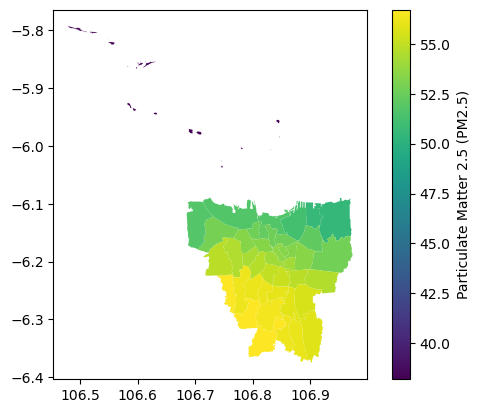

In [96]:
polygon_result.plot(column="pm2p5", legend=True, legend_kwds={"label": "Particulate Matter 2.5 (PM2.5)"})

In [97]:
polygon_result.to_file('polygon_pm25_result_kecamatan.shp')

/var/folders/81/vqbnjx_x20zdr2m7bscdvp5r0000gn/T/ipykernel_17412/1539480848.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  polygon_result.to_file('polygon_pm25_result_kecamatan.shp')
